In [1]:
import pickle
import sys
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')
from execute_remote_scripts import *
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Max Tost\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
file = load_pickle(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\20_random_JET_data.pkl')
shot = file['JETno85000']

In [3]:
shot.keys()

dict_keys(['SSXcore', 'IP', 'DAO_EDG7', 'WMHD', 'Flat_top', 'Ramp_down', 'disr_ipla_td', 'Ramp_up', 'RNT'])

In [4]:
shot.keys()
SSX = shot['SSXcore']
t_b = shot['Ramp_up'][0]
t_e = shot['Ramp_down'][0]
print(t_b, t_e)

40.917400001490115 59.46590000149011


In [5]:
df_time = pd.DataFrame(shot['SSXcore']['time'])
index_b, index_e = df_time[(df_time[0] > t_b)].index[0], df_time[(df_time[0] > t_e)].index[0]
print(index_b, index_e)

22936 486648


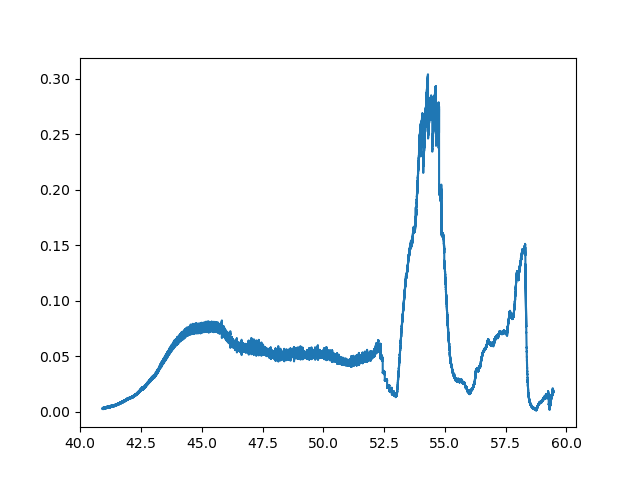

In [6]:
plt.plot(SSX['time'][index_b:index_e], SSX['signal'][index_b:index_e])
plt.show()

In [7]:
df = pd.DataFrame({
    'time': SSX['time'],
    'signal': SSX['signal']
})

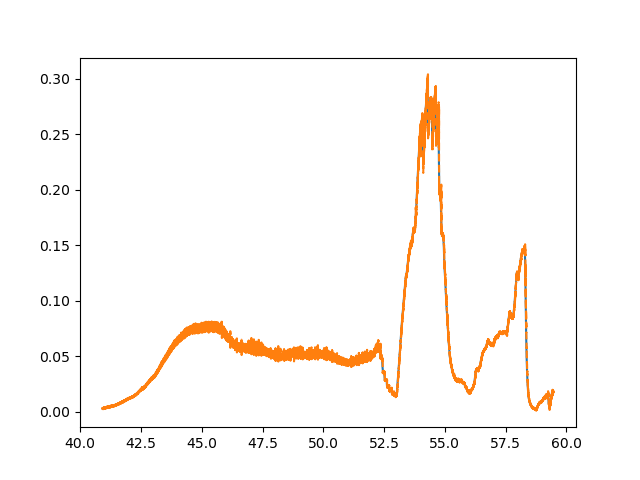

In [17]:
plt.close()
downsampled_time, downsampled_signal = downsample_timeseries(t_b, t_e, SSX['time'], SSX['signal'], 1000, method='mean')
plt.plot(downsampled_time, downsampled_signal)
plt.plot(SSX['time'][index_b:index_e], SSX['signal'][index_b:index_e], '--')
plt.show()

In [15]:
len(SSX['time'][index_b:index_e])//1000

463